In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


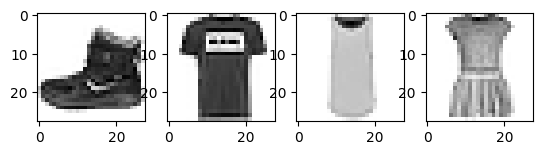

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0],cmap='Greys')
ax2.imshow(train_images[1],cmap='Greys')
ax3.imshow(train_images[2],cmap='Greys')
ax4.imshow(train_images[3],cmap='Greys')

In [4]:
print(train_labels[:4])

[9 0 0 3]


In [5]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

labels = train_labels[:4]
for i in labels :
  print('{}:{}'.format(i,mnist_lbl[i]))

9:Ankle boot
0:T-shirt
0:T-shirt
3:Dress


Text(0, 0, 'Dress')

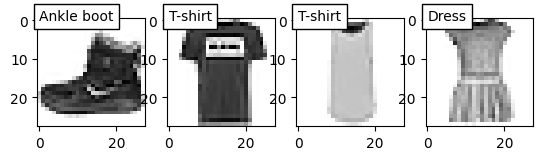

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0],cmap='Greys')
ax2.imshow(train_images[1],cmap='Greys')
ax3.imshow(train_images[2],cmap='Greys')
ax4.imshow(train_images[3],cmap='Greys')

ax1.text(0, 0, mnist_lbl[train_labels[0]],bbox={'facecolor':'white'})
ax2.text(0, 0, mnist_lbl[train_labels[1]],bbox={'facecolor':'white'})
ax3.text(0, 0, mnist_lbl[train_labels[2]],bbox={'facecolor':'white'})
ax4.text(0, 0, mnist_lbl[train_labels[3]],bbox={'facecolor':'white'})

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)  #모델을 evaluate하면 loss값과 accuracy값을 얻는다.

print('테스트정확도:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7766 - loss: 0.6231
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8647 - loss: 0.3665
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8775 - loss: 0.3312
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8869 - loss: 0.3049
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8944 - loss: 0.2848
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8989 - loss: 0.2699
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9042 - loss: 0.2560
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9075 - loss: 0.2452
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9097 - loss: 0.2402
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9130 - loss: 0.2304
313/313 - 1s - 2ms/step - accuracy: 0.8885 - loss: 0.3246
테스트정확도: 0.8884999752044678


합성곱 신경망의 최종단계 : 평탄화

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
train_images = train_images[: , :, :, np.newaxis]
test_images = test_images[: , :, :, np.newaxis]
train_images, test_images = train_images / 255, test_images / 255

In [22]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1),
                        kernel_size = (3,3), padding = 'same',
                        filters = 32),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(kernel_size=(3,3), padding='same',
                        filters= 64),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(kernel_size=(3,3), padding='same',
                        filters= 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,570 (947.54 KB)

 Trainable params: 242,570 (947.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                 epochs=5, validation_split=0.25)  #교차검정 25%를 의미함

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 49ms/step - accuracy: 0.7790 - loss: 0.6212 - val_accuracy: 0.8790 - val_loss: 0.3341
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.8871 - loss: 0.3082 - val_accuracy: 0.8941 - val_loss: 0.2950
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9042 - loss: 0.2575 - val_accuracy: 0.9032 - val_loss: 0.2619
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.9181 - loss: 0.2167 - val_accuracy: 0.9072 - val_loss: 0.2552
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9323 - loss: 0.1818 - val_accuracy: 0.9071 - val_loss: 0.2771


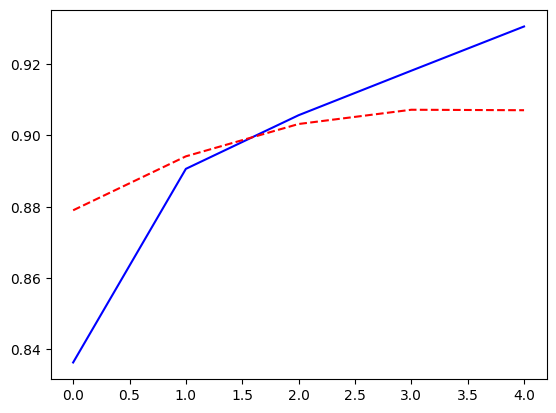

In [24]:
plt.plot(hist.history['accuracy'],'b-')
plt.plot(hist.history['val_accuracy'],'r--')

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('테스트정확도',test_acc)

313/313 - 3s - 10ms/step - accuracy: 0.8964 - loss: 0.2991
테스트정확도 0.896399974822998


In [26]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

images = test_images[:25]
pred = np.argmax(model.predict(images),axis=1)
print('예측값=',pred)
print('실제값=',test_labels[:25])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
예측값= [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 4 8 0 2 5 7 5 1]
실제값= [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


<도전문제 13.1에 대한 답변>

1. 신경망데이터 테스트정확도 0.896399974822998
2. 위치 12에 대한 값은 5(Coat), 실제값도 5 (Coat)



<과제1>

1) 도전문제 1의 정확도의 비교하여,

2) s78에서 MaxPolling2D(3,3), stride=2)로 했을때 정확도가 어떻게 변하였나요. 변화의 이유에 대해서 설명하세요.

-> 테스트 정확도 0.8986999988555908로 변화됨. 0.003 정확도 상승. 풀링 윈도우 크기를 3x3으로 늘리면, 모델이 각 풀링 연산에서 더 많은 특징을 캡쳐할 수 있습니다. 이는, 변환 불변성이 개선되어, 과적합을 감소할 수 있습니다. 이러한 요소들이 결합되어 정확도 향상에 기여할 수 있음.

3) s78에서 MaxPolling2D(2,2), stride=3)로 했을때 정확도가 어떻게 변하였나요. 변화의 이유에 대해서 설명하세요.

-> 테스트정확도 0.8823999762535095 변화됨. 0.014 정확도 하락. stride를 2에서 3으로 늘리면, 풀링연산에서 더 많은 픽셀을 건너뛰게 되어 특징 감지에 중요한 정보가 손실될 수 있음. stride가 커지면 특징 맵의 크기가 줄어들게 되고, 이는 초기 신경망 구성에 문제가 생길 수 있음.


In [27]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1),
                        kernel_size = (3,3), padding = 'same',
                        filters = 32),
    keras.layers.MaxPooling2D((3,3), strides=2),
    keras.layers.Conv2D(kernel_size=(3,3), padding='same',
                        filters= 64),
    keras.layers.MaxPooling2D((3,3), strides=2),
    keras.layers.Conv2D(kernel_size=(3,3), padding='same',
                        filters= 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189,322 (739.54 KB)

 Trainable params: 189,322 (739.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                 epochs=5, validation_split=0.25)  #교차검정 25%를 의미함

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('테스트정확도',test_acc)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 47ms/step - accuracy: 0.7565 - loss: 0.6793 - val_accuracy: 0.8699 - val_loss: 0.3529
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.8807 - loss: 0.3187 - val_accuracy: 0.8824 - val_loss: 0.3251
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.9007 - loss: 0.2729 - val_accuracy: 0.8960 - val_loss: 0.2802
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9112 - loss: 0.2428 - val_accuracy: 0.9034 - val_loss: 0.2691
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9221 - loss: 0.2108 - val_accuracy: 0.9049 - val_loss: 0.2694
313/313 - 4s - 12ms/step - accuracy: 0.8987 - loss: 0.2882
테스트정확도 0.8986999988555908


In [29]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1),
                        kernel_size = (3,3), padding = 'same',
                        filters = 32),
    keras.layers.MaxPooling2D((2,2), strides=3),
    keras.layers.Conv2D(kernel_size=(3,3), padding='same',
                        filters= 64),
    keras.layers.MaxPooling2D((2,2), strides=3),
    keras.layers.Conv2D(kernel_size=(3,3), padding='same',
                        filters= 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,730 (307.54 KB)

 Trainable params: 78,730 (307.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                 epochs=5, validation_split=0.25)  #교차검정 25%를 의미함

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('테스트정확도',test_acc)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7404 - loss: 0.7176 - val_accuracy: 0.8695 - val_loss: 0.3548
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.8762 - loss: 0.3366 - val_accuracy: 0.8792 - val_loss: 0.3292
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.8917 - loss: 0.2915 - val_accuracy: 0.8947 - val_loss: 0.2897
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.9035 - loss: 0.2571 - val_accuracy: 0.8959 - val_loss: 0.2859
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9132 - loss: 0.2294 - val_accuracy: 0.8930 - val_loss: 0.3025
313/313 - 2s - 6ms/step - accuracy: 0.8824 - loss: 0.3306
테스트정확도 0.8823999762535095
